In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import copy

In [2]:
df=pd.read_csv("AdmissionDataset/data.csv")
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
Y = df['Chance of Admit ']
X = (X - X.mean())/X.std()

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

In [4]:
# X_test = (X_test - X_test.mean())/X_test.std()
# X_train = (X_train - X_train.mean())/X_train.std()

In [5]:
def mse(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.power((y_true - y_pred),2))

In [6]:
lamda = 1000
ans=lamda
errorlist=[]
lamdalist=[]
prev=100000000
while lamda>=0.0000000001:
    ridgereg = Ridge(alpha=lamda)
    ridgereg.fit(X_train,Y_train)
    y_pred = ridgereg.predict(X_test)
    
    error=1-r2_score(y_pred,Y_test)
    
    if error < prev:
        ans=lamda*10
        prev=error
        
    print(r2_score(Y_test,y_pred))
    errorlist.append(error)
#     errorlist.append(error)
    lamdalist.append(lamda)
    lamda=lamda/10

0.6411653067351564
0.763630197472702
0.7740476437277459
0.7747955209853925
0.7748552565157759
0.7748610342913766
0.7748616100549903
0.7748616676111548
0.7748616733665692
0.7748616739421086
0.7748616739996625
0.7748616740054179
0.7748616740059935
0.774861674006051


In [7]:
print(ans)

1.0000000000000003e-09


[1.259471638284339, 0.3557949112271901, 0.29587751325921496, 0.28927586491494583, 0.2886047615024808, 0.2885375435958659, 0.2885308207351869, 0.28853014843842484, 0.28853008120864176, 0.28853007448566226, 0.2885300738133645, 0.2885300737461345, 0.28853007373941164, 0.2885300737387393]


Text(0.5, 1.0, 'Lamda vs Error')

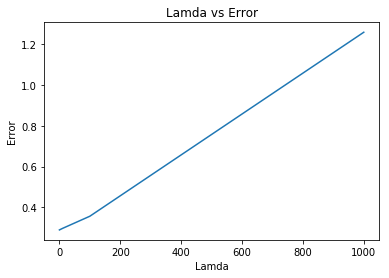

In [8]:
fig, ax = plt.subplots()
# print(lamdalist)
print(errorlist)
ax.plot(lamdalist,errorlist)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')

In [9]:
X_train_c = X_train
ones = np.ones([X_train_c.shape[0],1])

In [10]:
X_train_c = np.concatenate((ones,X_train_c),axis=1)

In [11]:
Y_train_c = pd.DataFrame(Y_train)
Y_train_c = Y_train_c.values
# Y_train_c.shape

In [12]:
alpha = 0.01
iters = 10000

In [13]:
def gradientDescent(X,y,theta,iters,alpha,lamda):
    for i in range(iters):
        theta1=copy.deepcopy(theta)
        theta1[0][0]=0
        theta = theta - (alpha/len(X)) * (np.sum(X * (X @ theta.T - y), axis=0)+lamda*theta1)
    
    return theta

In [14]:
lamda = 1000
errorlist=[]
lamdalist=[]
ans=lamda
prev=100000000
while lamda>=0.0000000001:
    theta = np.zeros([1,8])
    g = gradientDescent(X_train_c,Y_train_c,theta,iters,alpha,lamda)
    theta=g[0]
    y_pred=[]
    for index,row in X_test.iterrows():
        row=list(row)
        y1=0
        for i in range(0,7):
            y1 = y1 + theta[i+1]*row[i]
        y1=y1+theta[0]
        y_pred.append(y1)
        
    error=1-r2_score(y_pred,Y_test)
    
    if error < prev:
        ans=lamda*10
        prev=error
    
    errorlist.append(error)
    lamdalist.append(lamda)
    print(r2_score(Y_test,y_pred))
    lamda=lamda/10

0.6411653067351584
0.7636301974727018
0.7740476437096024
0.7747955208181142
0.7748552563108986
0.7748610340823686
0.7748616098455653
0.774861667401688
0.7748616731570983
0.7748616737326373
0.7748616737901911
0.7748616737959464
0.774861673796522
0.7748616737965797


In [15]:
print(ans)

1.0000000000000003e-09


[1.259471638284329, 0.35579491122719054, 0.2958775133191942, 0.2892758656481025, 0.28860476244258226, 0.28853754455961156, 0.28853082170132915, 0.2885301494048069, 0.28853008217504794, 0.288530075452071, 0.2885300747797732, 0.28853007471254366, 0.2885300747058205, 0.28853007470514824]


Text(0.5, 1.0, 'Lamda vs Error')

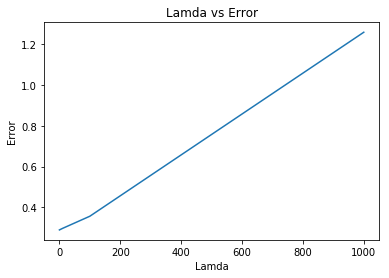

In [16]:
fig, ax = plt.subplots()
# print(lamdalist)
print(errorlist)
ax.plot(lamdalist,errorlist)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')